## Pre-processing 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data 
df = pd.read('#placeholder for original data')

---

### Feature Engineering

In [141]:
# extract MBTI from flair text 
import re 

mbti = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']
pat = '|'.join(r"\b{}\b".format(x) for x in mbti)

df2_clean['personality'] = df2_clean['flair_text'].str.findall(pat, flags=re.I).str.join(' ')

In [142]:
# transform text in personality column to all upper case 
df2_clean['personality'] = df2_clean['personality'].str.upper()

Some users have multiple MBTI personalities in their flair texts, after examing the flairs, I decide to only keep the first one. 

In [144]:
# split the first MBTI indicator from the rest 
new = df2_clean['personality'].str.split(' ', n=1, expand=True)

In [145]:
# rename the sub df
new.columns=['first','second']

In [147]:
# add the separated MBTI to the main dataframe
df2_clean['MBTI'] = new['first']

In [148]:
# drop the personality column and rename all the columns 
df2_clean = df2_clean.drop('personality', axis=1)

In [149]:
# rename the columns 
df2_clean.columns = ['flair','comments','subreddit','username','MBTI']
df2_clean.head()

,flair,comments,subreddit,username,MBTI
0,INFP: The Dreamer Senpai,Lol that's why I left.,entp,LadyBanterbury,INFP
1,INTP: The Theorist,"I was just about to post ""I try telling people all the time that I'm always joking unless I say 'I am being serious right now' and they still don't catch on!"" But here you've already figured out the secret. It's like you know me.",INTP,Finarin,INTP
2,INFP: The Dreamer,My first thought was Pepsi or something. Probably not alcohol.,WTF,xanplease,INFP
3,"ENTP: Antisocial Extrovert, Rational Eccentric","Not if the formula is something like ""every time it says 'Do', add 5 bpm"". Then it would be arithmetic.",youtubehaiku,HeirToGallifrey,ENTP
4,INTP/18/m/blankly staring at you,Does this imply I'm a five now?,entp,lightfive,INTP


In [152]:
#check unique values and counts in the MBTI columns 
df2_clean['MBTI'].value_counts()

INFP    937352
INTP    902498
INFJ    816254
ENTP    675685
INTJ    529188
ENTJ    193037
ISTP    169520
ENFP    154679
ENFJ    91137 
ESTP    40101 
ISFJ    39508 
ISTJ    38636 
ISFP    26766 
ESTJ    17941 
ESFP    12475 
ESFJ    11311 
        9912  
Name: MBTI, dtype: int64

In [159]:
# there is 9912 comments with no MBTI indicators, we will remove them from the df
df2_clean = df2_clean[df2_clean['MBTI']!=''].copy()

Text(0.5, 1.0, 'Comments Counts by Personality Types')

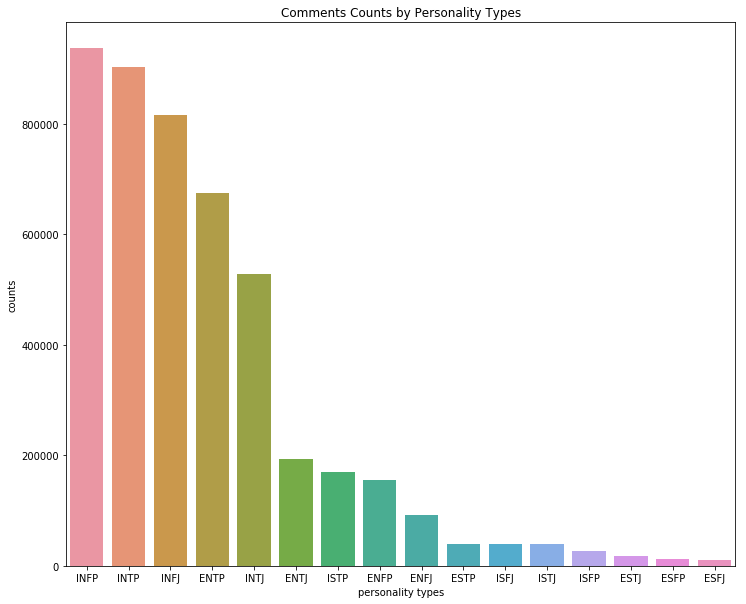

In [160]:
plt.figure(figsize=(12,10))
sns.countplot(data=df2_clean, x='MBTI', order = df2_clean['MBTI'].value_counts().index)
plt.xlabel('personality types')
plt.ylabel('counts')
plt.title('Comments Counts by Personality Types')

From the above graph we can see that INFP, INTP, INFJ, ENTP and INTJ contribute the most comments in our set. This reflects the nature of Reddit, however, the imbalance of the data is not great for our model. Therefore, I decide to keep one block of the data from the first 5 personalities and use 3 blocks of the data for the remaining personalities. 

### Dealing with Imbalanced Data

In [175]:
# read in a block of data
df3 = pd.read_csv('mbti_reddit_2.csv')

In [176]:
#check missing value
df3.isna().sum()

flair_text    0 
body          10
subreddit     0 
author        0 
dtype: int64

In [177]:
# drop missing value
df3 = df3.dropna().copy()

In [178]:
# extract MBTI from flair text 
import re 

mbti = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']
pat = '|'.join(r"\b{}\b".format(x) for x in mbti)

df3['personality'] = df3['flair_text'].str.findall(pat, flags=re.I).str.join(' ')

In [179]:
# transform text in personality column to all upper case 
df3['personality'] = df3['personality'].str.upper()

Some users have multiple MBTI personalities in their flair texts, after examing the flairs, I decide to only keep the first one. 

In [180]:
# split the first MBTI indicator from the rest 
new1 = df3['personality'].str.split(' ', n=1, expand=True)

In [181]:
# rename the sub df
new1.columns=['first','second']

In [182]:
# add the separated MBTI to the main dataframe
df3['MBTI'] = new1['first']

In [183]:
# drop the personality column and rename all the columns 
df3 = df3.drop('personality', axis=1)

In [184]:
# rename the columns 
df3.columns = ['flair','comments','subreddit','username','MBTI']
df3.head()

,flair,comments,subreddit,username,MBTI
0,[INTJ],"Apparently my aunt almost gave my brother dog treats in his stockings because ""they have cute dogs on them and say they're nutritious""! She's not all there... the family kind of buys gifts 'from' her now, instead of letting her buy everything herself.",AskReddit,JustALittleWeird,INTJ
1,INFJ - 26 - Gay,"Ah, I'm sorry for the confusion. That was not my intent.",rupaulsdragrace,coniferous1,INFJ
2,ENFP,i thought i was the only one omg like what would it be like,AskReddit,sosnazzy,ENFP
3,[INFP],"This makes total sense to me. How can a Fi-dom get out of that? By trying to listen to other people on their own terms, and not instantly reject what they're saying as wrong if it doesn't square up to their own internal system of values? I think sometimes, as a Fi-user, it is hard for me to REALLY get to know other people, rather than to get to know them for how they relate to and affect me.",mbti,Stiamata,INFP
4,ENTP| Weaponized autism,I never rolled in DS. Only ran.\n\nEDIT: I guess vomit would be inevitable in that case.,pcmasterrace,lightseven,ENTP


In [185]:
#check unique values and counts in the MBTI columns 
df3['MBTI'].value_counts()

INFP    312352
INTP    301092
INFJ    271756
ENTP    225714
INTJ    176348
ENTJ    64745 
ISTP    56786 
ENFP    51369 
ENFJ    30349 
ESTP    13357 
ISFJ    13057 
ISTJ    12841 
ISFP    8890  
ESTJ    5959  
ESFP    4172  
ESFJ    3836  
        3242  
Name: MBTI, dtype: int64

In [195]:
# select personalities we want to keep 
mbti_selection = ['ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']

df3_sub = df3[df3['MBTI'].isin(mbti_selection)].copy()

In [197]:
# check unique values 
df3_sub['MBTI'].value_counts()

ENTJ    64745
ISTP    56786
ENFP    51369
ENFJ    30349
ESTP    13357
ISFJ    13057
ISTJ    12841
ISFP    8890 
ESTJ    5959 
ESFP    4172 
ESFJ    3836 
Name: MBTI, dtype: int64

In [198]:
# save to new csv file 
df3_sub.to_csv('mbti_reddit_2select.csv')

### Some EDA

In [90]:
df2['comments length'] = df2['comments'].str.len()

In [98]:
df_avglength=pd.DataFrame(df2.groupby(['MBTI'])['comments length'].mean())
df_avglength = df_avglength.sort_values(['comments length'], ascending=False)
df_avglength

,comments length
MBTI,
ESFJ,281.798475
ISTP,258.881164
ISFP,245.555543
INTJ,245.320098
ESTJ,244.041261
INFJ,234.872556
ENFJ,224.866158
ENTP,221.916367
ISTJ,219.849907


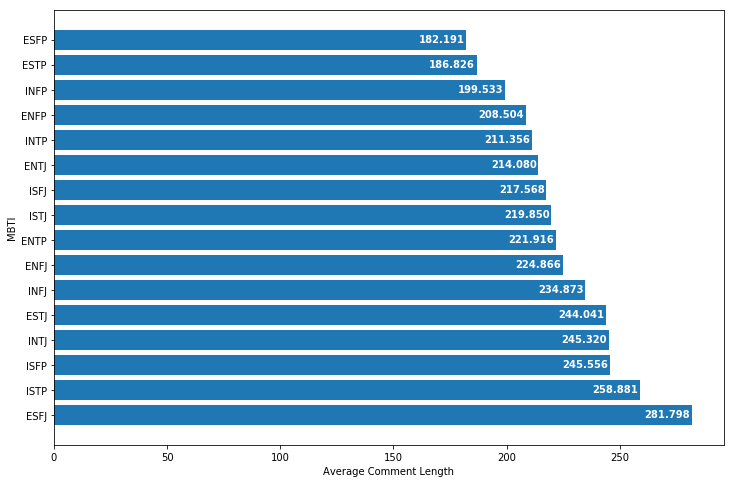

In [99]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
plt.barh(df_avglength.index,df_avglength['comments length'])
plt.xlabel('Average Comment Length')
plt.ylabel('MBTI')
for i, v in enumerate(df_avglength['comments length']):
    ax.text(v-21, i - 0.1, f'{v:.3f}', color='white', fontweight='bold')
plt.show()

In [42]:
# create a sub df for text processing 
df2_comments = df2[['flair','comments','username']]

In [43]:
df2_mbti = df2[['flair','username','MBTI']]

In [44]:
# some comments are made by the same user, group these comments by users
df2_comments.groupby(['flair', 'username'])['comments'].apply('.'.join).reset_index()

flair             username  \
0      \tINFP:The Mediator                  karlmarx6666          
1       ENTP "'lady"                        mcflycasual           
2       INFJ 24 M                           International_Ninja   
3       INFJ LSD                            MirageAsti            
4       INFJ-926                            Pensiive              
...          ...                                 ...              
16399  ❄ INFJ ❄                             scandimix             
16400  ❄ INFJ ❄                             wingsandboldlips      
16401  �� 눈_눈 lvl 100 shitting ISTJ ಠ_ಠ ��  Cerilea               
16402  ��INTP 5w6��                         TwiztedZero           
16403  ����infj 4w5 sp/sx����               yukaby                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [45]:
df2_comments['personality'] = df2_comments['flair'].str.findall(pat, flags=re.I).str.join(' ')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
